In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('startup data.csv')

In [3]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [4]:
df.shape

(923, 49)

In [5]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

<h2> Data Cleaning </h2>

In [7]:
df['founded_at'].dtype

dtype('O')

<h4> 1. Handling mismatch in data types

In [8]:
# Converting object type to date type 

df['founded_at'] = pd.to_datetime(df['founded_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'])
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'])

In [9]:
df['founded_at'].head()

0   2007-01-01
1   2000-01-01
2   2009-03-18
3   2002-01-01
4   2010-08-01
Name: founded_at, dtype: datetime64[ns]

<h4> 2. Handling null-values </h4>

In [10]:
df.isna().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [11]:
# It is seen that there are null values in 'closed_at' columns, getting the last available date

df['closed_at'].max()

Timestamp('2013-10-30 00:00:00')

In [12]:
# filling the na values in closed date column with an assumption 

last_date = pd.to_datetime('2013-12-31')
df['closed_at'] = df['closed_at'].fillna(last_date)

In [13]:
# checking if the 152 null values in both the milestone columns are of same index

if (df['age_first_milestone_year'].isna().index == df['age_last_milestone_year'].isna().index).all():
    print('Yes both the columns have null values at the same index')

Yes both the columns have null values at the same index


In [14]:
# Counting the closed/acquired status of these null values

df_mile = df.loc[df['age_last_milestone_year'].isna(),'status'].reset_index()
df_mile['status'].value_counts()

closed      105
acquired     47
Name: status, dtype: int64

In [15]:
df.groupby(['status'])['age_last_milestone_year'].mean()

status
acquired    5.295417
closed      3.408055
Name: age_last_milestone_year, dtype: float64

In [16]:
df.groupby(['status'])['age_first_milestone_year'].mean()

status
acquired    3.361397
closed      2.293706
Name: age_first_milestone_year, dtype: float64

In [17]:
# It is seen that more than half of the Nan values are closed, Hence these null values are replaced by the avg.closed values

df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(2)
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(3)
df.isnull().sum()

# Now all the null values from the dataframe are removed

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                     0
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year      0
age_last_milestone_year       0
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

<h4> 3. Feature optimization </h4>

In [18]:
df.loc[:,['closed_at','founded_at']].head()

,closed_at,founded_at
0,2013-12-31,2007-01-01
1,2013-12-31,2000-01-01
2,2013-12-31,2009-03-18
3,2013-12-31,2002-01-01
4,2012-10-01,2010-08-01


In [19]:
# Adding a column for age of each company

df['company_age'] = (df['closed_at'] - df['founded_at'])/np.timedelta64(1,'Y')

In [20]:
df.company_age.head()

0     6.998090
1    13.998919
2     4.788599
3    11.997509
4     2.168422
Name: company_age, dtype: float64

<h4> 4.Outliers </h4>

In [21]:
# checking for outliers

neg_age = df['company_age']<0
neg_age.sum()

3

In [22]:
# removing the outliers

df = df.loc[lambda df: df['company_age']>0,:].reset_index()

In [23]:
df['name'].nunique()

919

In [24]:
# shape has 920 but unique terms in name column is 919, so have to remove the duplicate

df['name'].value_counts()

Redwood Systems         2
Bandsintown             1
xkoto                   1
Jobs2Web                1
HighlightCam            1
                       ..
Powerset                1
Kiptronic               1
Cozi Group              1
Likewise Software       1
Asempra Technologies    1
Name: name, Length: 919, dtype: int64

In [25]:
df.loc[df['name']=='Redwood Systems']

,index,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,company_age
122,124,506,CA,37.54827,-121.988572,94538,c:28482,Fremont,Fremont CA 94538,Redwood Systems,...,1,0,1,1,1,0,2.25,1,acquired,5.998754
829,832,505,CA,37.48151,-121.945328,94538,c:28482,Fremont,NaN,Redwood Systems,...,1,0,1,1,1,0,2.25,1,acquired,5.998754


In [26]:
# Dropping the duplicate row

df.drop(df.iloc[[829]].index, inplace=True)

In [27]:
df.loc[df['name']=='Redwood Systems']

,index,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,company_age
122,124,506,CA,37.54827,-121.988572,94538,c:28482,Fremont,Fremont CA 94538,Redwood Systems,...,1,0,1,1,1,0,2.25,1,acquired,5.998754


In [28]:
# dropping the additional index column which was generated during removing 'age' outliers

df.drop(columns = ['index'], inplace=True)

In [29]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status', 'company_age'],
      dtype='object')

In [30]:
df.to_excel('forpower.xlsx')

## Exploratory Data Analysis

In [ ]:
sns.pairplot(df, x_vars=['labels', 'age_first_funding_year', 'age_last_funding_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'category_code', 'has_VC', 'has_angel', 'avg_participants', 'is_top500', 'company_age', 'status'], y_vars=['labels', 'age_first_funding_year', 'age_last_funding_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'category_code', 'has_VC', 'has_angel', 'avg_participants', 'is_top500', 'company_age', 'status' ])

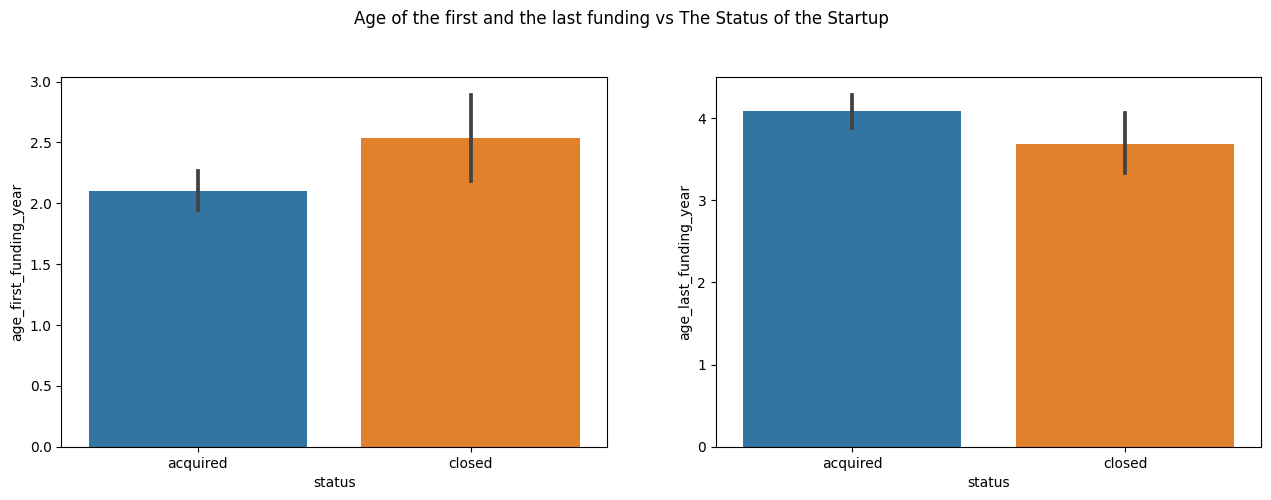

In [31]:
plt.subplot(1,2,1)
sns.barplot(data=df, x = 'status', y='age_first_funding_year')

plt.subplot(1,2,2)
sns.barplot(data=df, x = 'status', y='age_last_funding_year')

plt.suptitle('Age of the first and the last funding vs The Status of the Startup', x= 1, y= 1.02)
plt.subplots_adjust(left=None, bottom=None, right=2)

<h4> <center> If the first funding is too late, There is a high possibility to be pushed to loss </center></h4>

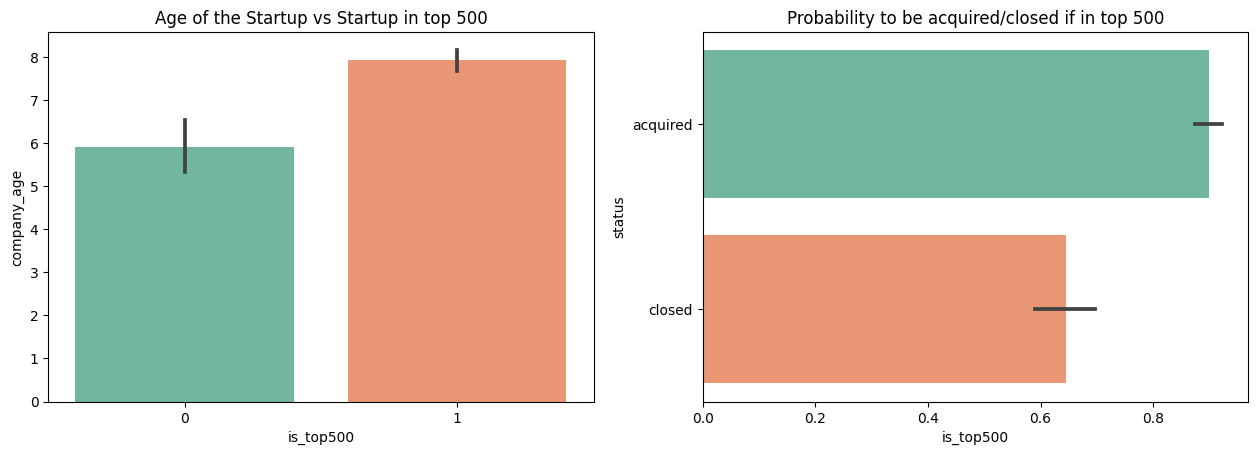

In [32]:
plt.subplot(1,2,1)
sns.barplot(data=df, x='is_top500',y='company_age', palette =sns.color_palette("Set2",5))
plt.title('Age of the Startup vs Startup in top 500')

plt.subplot(1,2,2)
sns.barplot(data=df, x='is_top500',y='status', palette =sns.color_palette("Set2",5))
plt.title('Probability to be acquired/closed if in top 500')

plt.subplots_adjust(right=2)

 <h4> <center> The probablity of a company being acquired is high, when it reaches top_500 position and sustain longer period of time </center></h4>

In [33]:
# frequency of acquired categories

acq_cat = df.loc[df['status']=='acquired']['category_code'].value_counts().nlargest(7).reset_index().rename(columns={'index':'Category', 'category_code':'Frequency'})

In [34]:
# frequency of different categories

df_cat = df['category_code'].value_counts().nlargest(7).reset_index().rename(columns={'index':'Category', 'category_code':'Frequency'})

Text(0, 0.5, 'Startups')

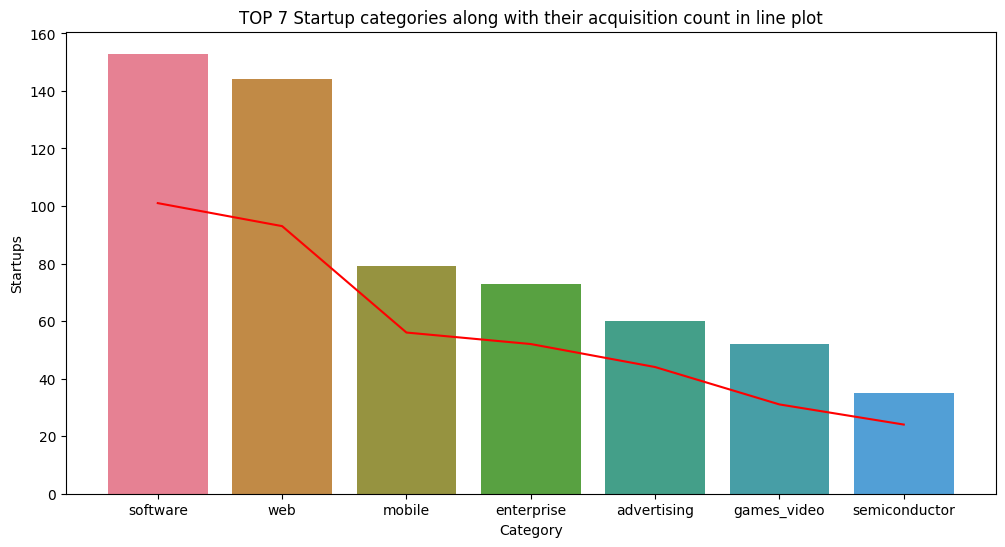

In [35]:
plt.figure(figsize = (12,6))
sns.barplot(data=df_cat, x='Category',y='Frequency', palette=sns.color_palette("husl", 9))
sns.lineplot(data=acq_cat, x='Category',y='Frequency', color = 'red')
plt.title('TOP 7 Startup categories along with their acquisition count in line plot')
plt.ylabel('Startups')

In [36]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status', 'company_age'],
      dtype='object')

In [37]:
rel_fund = df.groupby(['relationships','funding_total_usd']).size().reset_index()
rel_fund = rel_fund.pivot_table(index='relationships', values='funding_total_usd', aggfunc='mean').nlargest(10, columns=['funding_total_usd']).reset_index()

Text(0.5, 1.0, 'Mean relationship with highest funding')

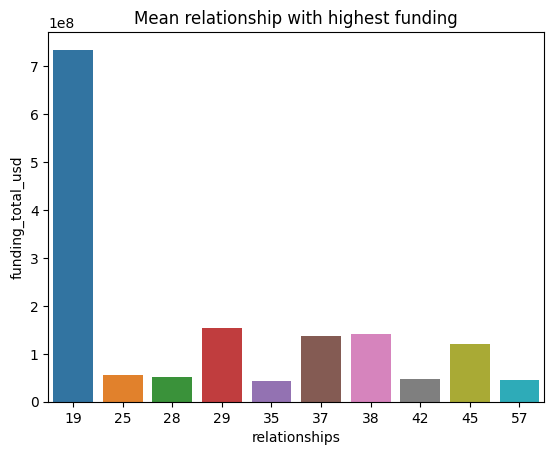

In [38]:
# Optimal number of relationship with highest funding

sns.barplot(data=rel_fund, x='relationships', y='funding_total_usd')
plt.title('Mean relationship with highest funding')

In [39]:
# Ranking the states from which the Startups where acquired

acq_state = df.loc[df['status']=='acquired']['state_code'].value_counts().nlargest(7).reset_index().rename(columns={'index':'State', 'state_code':'Frequency'})

In [40]:
# Overall Ranking of the states with the Startups 

df_state = df['state_code'].value_counts().nlargest(7).reset_index().rename(columns={'index':'State', 'state_code':'Frequency'})

Text(0, 0.5, 'Startups')

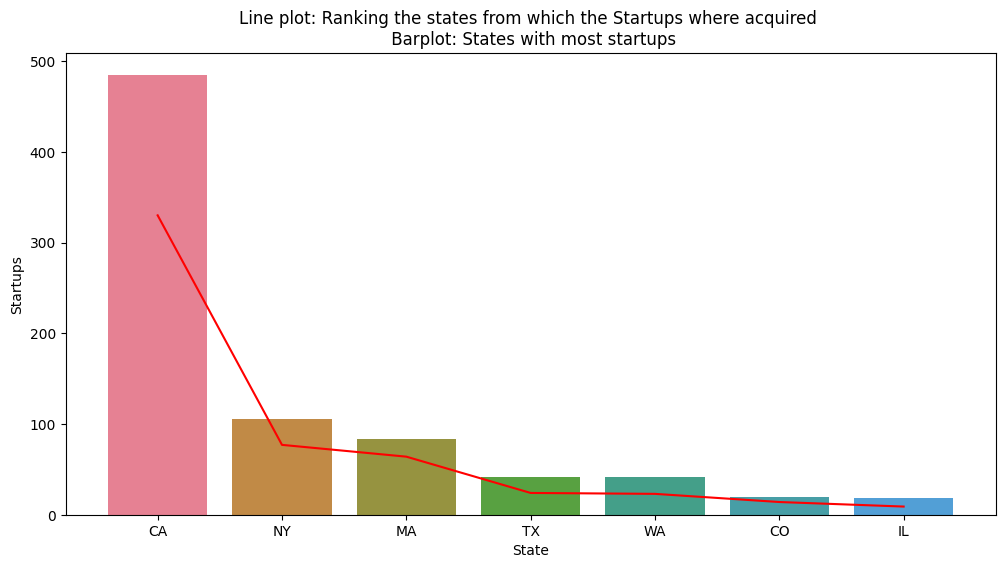

In [41]:
plt.figure(figsize = (12,6))
sns.barplot(data=df_state, x='State',y='Frequency', palette=sns.color_palette("husl", 9))
sns.lineplot(data=acq_state, x='State',y='Frequency', color = 'red')
plt.title('Line plot: Ranking the states from which the Startups where acquired \n Barplot: States with most startups')
plt.ylabel('Startups')

In [42]:
# States with maximum funding

state_fund = df.groupby(['state_code','funding_total_usd']).size().reset_index()
state_fund = state_fund.pivot_table(index='state_code', values='funding_total_usd', aggfunc='mean').nlargest(10, columns=['funding_total_usd']).reset_index()

Text(0.5, 1.0, 'States with highest funding')

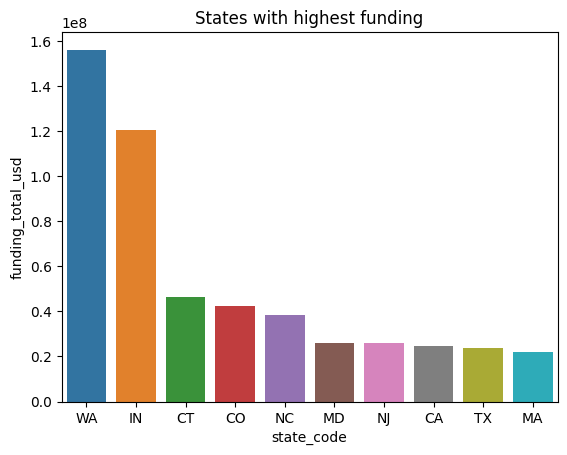

In [43]:
# Plot to show states which received most funding

sns.barplot(data=state_fund, x='state_code', y='funding_total_usd')
plt.title('States with highest funding')

<h4> <center> This shows that, even though the number of startups are very less in 'WA' compared to other states,<br> the funding is very high compared to 'CA' which has the highest average funding </center></h4>

In [44]:
# Number of Categories present in each state

df_state_cat = df.groupby(['state_code', 'category_code']).size().reset_index()
df_state_cat = df_state_cat.pivot_table(index='state_code', values='category_code', aggfunc='count').nlargest(10, columns=['category_code']).reset_index()

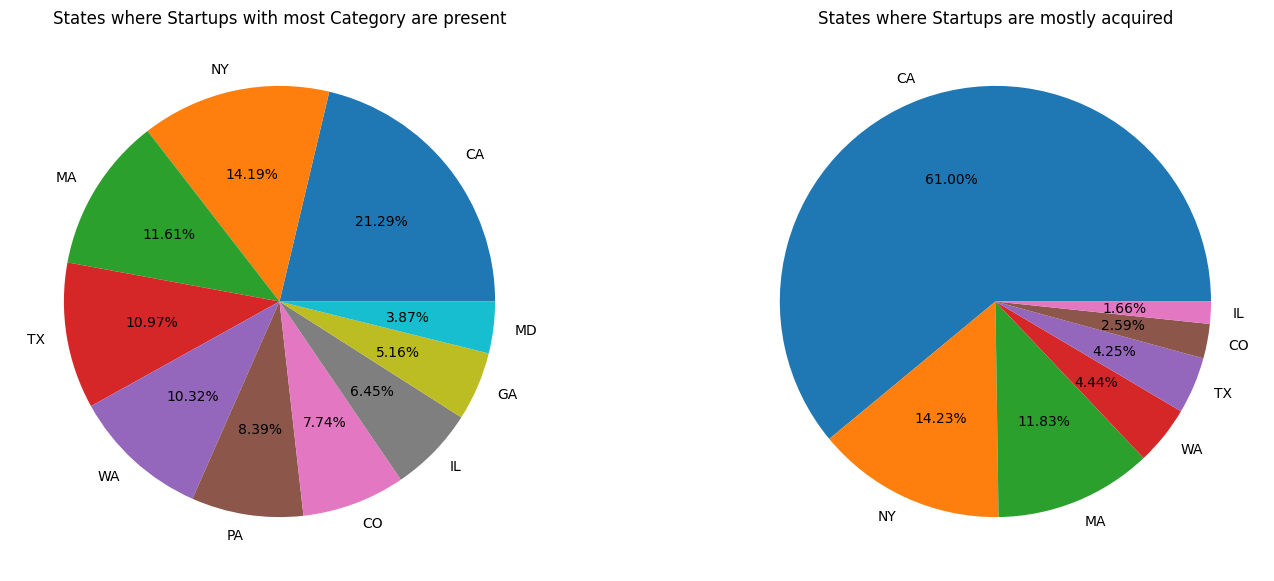

In [45]:
plt.figure(figsize=(7,7))

plt.subplot(1,2,1)
plt.pie(df_state_cat['category_code'], labels = df_state_cat['state_code'], autopct = '%1.2f%%' )
plt.title('States where Startups with most Category are present')

plt.subplot(1,2,2)
plt.pie(acq_state['Frequency'], labels = acq_state['State'], autopct = '%1.2f%%' )
plt.title('States where Startups are mostly acquired')

plt.subplots_adjust(right=2)

<h4> <center> Though CA stands 8th in terms if funding, More number of Startups and Categories makes it Successful in being acquired  </center></h4>

In [ ]:
df.columns

## Feature Selection

In [ ]:
remove_col = ['Unnamed: 0', 'name', 'state_code', 'latitude', 'longitude', 'zip_code', 'id', 'Unnamed: 6', 'founded_at','closed_at', 'first_funding_at', 'last_funding_at',  'state_code.1', 'category_code', 'object_id']

In [ ]:
# These are unnecessary columns and hence can be removed during Model fitting

len(remove_col)

In [ ]:
# Columns are dropped

df.drop(columns=remove_col,inplace=True)

In [ ]:
len(df.columns)

## Feature Engineering

In [ ]:
df.info()

In [ ]:
df = pd.get_dummies(df, columns = ['city'], drop_first = True)

In [ ]:
df.head()

## Data Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
X = df.drop(columns=['status'])
y = df['status']
y = pd.get_dummies(y)
y = y.drop(['closed'], axis = 1).squeeze()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

### 1.Gradient Boosting Classifier

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [ ]:
gbc.fit(X_train, y_train)

In [ ]:
y_pred_gbc = gbc.predict(X_test)

In [ ]:
gbc.score(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score

print(f'Accuracy Score is {accuracy_score(y_test,y_pred_gbc)}')

### 2. XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix

In [ ]:
xgbc = XGBClassifier()

In [ ]:
xgbc.fit(X_train, y_train)

In [ ]:
# Training accuracy with cross validation

scores = cross_val_score(xgbc, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

In [ ]:
# Training accuracy with k-fold 

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

In [ ]:
# Prediction

y_pred = xgbc.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
print(cm)

In [ ]:
print(f'Accuracy Score is {accuracy_score(y_test,y_pred)}')

### 3. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X, y)
y_pred_dtc = dtc.predict(X_test)

In [ ]:
dtc.score(X_test, y_test)

In [ ]:
print(f'Accuracy Score is {accuracy_score(y_test,y_pred_dtc)}')

### Checking with a single record

In [ ]:
check1 = X_train.iloc[2]
check = np.array(check1).reshape(1,-1)

In [ ]:
xgbc.predict(check)

## Pickle file

In [ ]:
import pickle

In [ ]:
pickle.dump(xgbc, open('xgboost.pkl', 'wb'))

In [ ]:
pickle_xg_model = pickle.load(open('xgboost.pkl', 'rb'))

In [ ]:
pickle_xg_model

In [ ]:
pickle_xg_model.predict(check)

## Json-record

#### -- Convert a single record to json and use the record to predict in the Postman API using Flask

In [ ]:
rec = X_test[0:1].to_json()

In [ ]:
import json
record = json.loads(rec)

In [ ]:
value = []
key = []

# value is retrieved by using double for loop since it is nested
for v in record.values():
    for vv in v.values():
        value.append(vv)

# retrieving the key        
for k in record.keys():
    key.append(k)

# zipping together and forming a new json_dictionary
dit = {}
for k,v in zip(key,value):
    dit[k]=v
    
json.dumps(dit)       # single record from the X_test